# FIT5212 S1 2021 
# Assessment 2: 


Student information:

- Family Name:- Nagrale
- Given Name:- Prajyot


# Table of Contents:

1. ** Task 1: Recommender System Callenge**

- 1.1. Install Libraries
- 1.2. Import Libraries
- 1.3. Available GPU
- 1.4. Read Data All
- 1.5. Add Dataset
- 1.6. Grouping Dataset
- 1.7. Changing datatype
- 1.8. Using .cat.codes
- 1.9. Creating Sparse Matrix
- 1.10. Recommonder Algorithm:
- 1.10.1. **ALS** 
- - 1.10.1.1. Hyperparameters
- - 1.10.1.2. Fit the model
- - 1.10.1.3. Recommend Function
- - 1.10.1.4. Getting sprase matrix from model
- - 1.10.1.5. Recommend items for each users
- - 1.10.1.6. Get top 15 items for each users from testing dataset
- - 1.10.1.7. Creating output file 
- 1.10.2. **MF**
- - 1.10.2.1. Encodes a pandas column with continous ids
- - 1.10.2.2. Encodes rating data with continous user and movie ids
- - 1.10.2.3. Encoding giving data
- - 1.10.2.4. Creating Matrix factorization model
- - 1.10.2.5. Traing the model
- - 1.10.2.6. Unsqueeze the data
- - 1.10.2.7. Creating loss function
- - 1.10.2.8. Creating lenth for data
- - 1.10.2.9. Hyper parameteres for MF function
- - 1.10.2.10. Fitting different learning rate for the model
- - 1.10.2.11. Getting the recommendation for testing data
- - 1.10.2.12. Recommend top 15 items
- - 1.10.2.13. Creating output file
- 1.10.3. **MF with bias**
- - 1.10.3.1. Creating MF with bias model
- - 1.10.3.2. Hyper parameteres for MF bias function
- - 1.10.3.3. Fitting different learning rate for the model
- - 1.10.3.4. Getting the recommendation for testing data
- - 1.10.3.5. Recommend top 15 items
- - 1.10.3.6. Creating output file
- 1.10.4. **Neural Network Model**
- - 1.10.4.1. Creating NN with bias model
- - 1.10.4.2. Hyper parameteres for MF bias function
- - 1.10.4.3. Fitting different learning rate for the model
- - 1.10.4.4. Getting the recommendation for testing data
- - 1.10.4.5. Recommend top 15 items
- - 1.10.4.6. Creating output file
- 1.11. Analysis

2. ** Task 2: Node Clustering in Graphs**

- 2.1. Import Libraries
- 2.2. Creating dataframe for adjedges file
- 2.3. Creating dataframe for docs file
- 2.4. Creating dataframe for labels file
- 2.5. Merging all dataframe
- 2.6. Assigning Graphs
- 2.7. Creating Nodes
- 2.8. Creating Edges
- 2.9. Getting graph for all connected nodes
- 2.10. ** Embedding: Node2Vec: **
- - 2.10.1. Node2Vec: For all edges and nodes which has labels
- - 2.10.2. Node2Vec: For all edges and all nodes 
- - 2.10.3. Node2Vec: For only those nodes that has edges and labels.
- 2.11. Saving Model
- 2.12. Checking embedding and similar nodes
- 2.13. Creating Random seed numbers
- 2.14. **K-means clustering:**
- - 2.14.1. K-means clustering: For all edges and nodes which has labels
- - 2.14.2. K-means clustering: For only those nodes that has edges and labels.
- - 2.14.3. K-means clustering: For all edges and all nodes 
- - 2.15. Embedding: **laplacian_matrix**: 
2.16. Analysis

# 1. **Part 1: Recommender System Callenge**

## 1.2. Install Libraries

In [5]:
!pip install implicit
!pip3 install node2vec

Implicit and Node 2 Vec are the two packages which we will require to install

## 1.2. Import Libraries

In [6]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F


import implicit
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import scipy.sparse as sparse

# Importing defaultdict
from collections import defaultdict

import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')


## 1.3. Available GPU

In [7]:
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


## 1.4. Read Data All

In [8]:
DF_train = pd.read_csv('./res2021/flickr_train_data.csv')
DF_test = pd.read_csv('./res2021/flickr_test_data.csv')
DF_valid = pd.read_csv('./res2021/flickr_validation_data.csv')

In [9]:
DF_train.head()

,user_id,item_id,rating
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


In [10]:
DF_test.head()

,user_id,item_id
0,0,8929
1,0,8906
2,0,8838
3,0,8821
4,0,8756


In [11]:
DF_valid.head()

,user_id,item_id,rating
0,0,20,1
1,0,3260,0
2,0,390,0
3,0,5425,0
4,0,8631,0


## 1.5. Add Dataset

In [12]:
DF_train_val = DF_train.append(DF_valid)

In [13]:
DF_train_val.head()

,user_id,item_id,rating
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


I mergered all the train and validation dataset together to increase the training datasize of the file. The more the size of the sample dataset its more helpful for the model to get closer to the population dataset.

## 1.6. Grouping Dataset

In [14]:
grouped_df = DF_train_val.groupby(['user_id', 'item_id', 'rating']).sum().reset_index()

This will help to group and sort the users and items as per the ratings. 

## 1.7. Changing datatype

In [15]:
grouped_df['user_id'] = grouped_df['user_id'].astype("category")
grouped_df['item_id'] = grouped_df['item_id'].astype("category")

Changing the datatype to category to do cat.codes for each feature

## 1.8. Using .cat.codes

In [16]:
grouped_df['user_id'] = grouped_df['user_id'].cat.codes
grouped_df['item_id'] = grouped_df['item_id'].cat.codes

## 1.9. Creating Sparse Matrix

In [17]:
sparse_item_user = sparse.csr_matrix((grouped_df['rating'].astype(float), (grouped_df['item_id'], grouped_df['user_id'])))
sparse_user_item = sparse.csr_matrix((grouped_df['rating'].astype(float), (grouped_df['user_id'], grouped_df['item_id'])))

In [18]:
sparse_item_user

<9004x3466 sparse matrix of type '<class 'numpy.float64'>'
	with 454846 stored elements in Compressed Sparse Row format>

In [19]:
sparse_user_item

<3466x9004 sparse matrix of type '<class 'numpy.float64'>'
	with 454846 stored elements in Compressed Sparse Row format>

I used sparse matrix to reduce the dimension of the of the users and items. This helps to reduce the size of the matrix and helps to do the computation faster. 

## 1.10. Models:

## 1.10.1. ALS Model
Explicit feedbacks are appraisals positioned on a concrete rating scale (such as from 1 to 5 stars). Users’ inclinations are expressly shown when they rate a thing that they like higher than a thing they don't like. Certain feedbacks are inferred within the client activities. The basic suspicion is that “if a client clicked/viewed/spent time on a thing regularly, it is a sign of its inclination for that item”. Certain criticism comes in numerous shapes, browsing, clicking, writing,... while unequivocal criticism exclusively comes from a few sort of evaluations scale. Express feedback is simple to work with, as the appraisals given by a client can be straightforwardly translated as the user’s inclinations, making its forecasts based on that more significant. Be that as it may, it is much less visit than verifiable input because it is badly arranged for the clients to rate everything that they associated with (and they ordinarily do not). Implicit feedback is less demanding to gather in huge amounts without any additional exertion on the user’s side and as such is much more visit. Although these strategies of suggestions are not commonly elite, in this area we’re focussing on a recommender exclusively based on verifiable appraisals.

The thought of lattice factorization is essentially to require an awfully huge network and part it up into two littler frameworks whose product equals the initial one. Substituting Slightest Squares could be a frame of network factorization that decreases this user-item framework to a much littler sum of measurement called inactive or covered up highlights. And it does so exceptionally computationally compelling.
## 1.10.1.1. Hyperparameters

In [20]:
model = implicit.als.AlternatingLeastSquares(factors=10, regularization=0.5, iterations=500)

I manually hyper-tuned the ALS paramteres and  go the below output from kaggle. 

1.   factors=32, regularization=0.1, iterations=50: Kaggle Score = 0.19
2.   factors=64, regularization=0.1, iterations=50: Kaggle Score = 0.17
3.   factors=32, regularization=0.01, iterations=50: Kaggle Score = 0.18
4.   factors=32, regularization=1, iterations=50: Kaggle Score = 0.19
5.   factors=32, regularization=1, iterations=100: Kaggle Score = 0.195
6.   factors=32, regularization=10, iterations=100: Kaggle Score = 0.19336
7.   factors=32, regularization=1000, iterations=100: Kaggle Score = 0.07
8.   factors=32, regularization=1, iterations=1000: Kaggle Score = 0.19296f
9.   factors=10, regularization=0.5, iterations=500: Kaggle Score = **0.22181**


In [21]:
alpha = 35
data = (sparse_item_user * alpha).astype('double')
data[1,:].todense()

matrix([[35.,  0.,  0., ...,  0.,  0.,  0.]])

## 1.10.1.2. Fit the model

In [22]:
model.fit(data)

  0%|          | 0/500 [00:00<?, ?it/s]

## 1.10.1.3. Recommend Function

Get the intuitive score from the meager individual substance matrix. Add 1 to everything, so that articles with no interaction however ended up break even with to 1. Make articles as of now associating zero. Get speck item of individual vector and all substance vectors. Scale this suggestion vector between and 1. Content as of now connecting have their proposal increased by zero. Sort the lists of the substance into arranging of best recommendations. Start purge list to store titles and scores. Append titles and scores to the list. Get the prepared individual and substance vectors. We change over them to CSR matrices. Create suggestions for individual with id 5.

In [23]:
def recommend(person_id, sparse_person_content, person_vecs, content_vecs):
    # Get the interactions scores from the sparse person content matrix
    person_interactions = sparse_person_content[person_id,:].toarray()
    # Add 1 to everything, so that articles with no interaction yet become equal to 1
    person_interactions = person_interactions.reshape(-1) + 1
    # Make articles already interacted zero
    person_interactions[person_interactions > 1] = 0
    # Get dot product of person vector and all content vectors
    rec_vector = person_vecs[person_id,:].dot(content_vecs.T).toarray()
    # Scale this recommendation vector between 0 and 1
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0]
    # Content already interacted have their recommendation multiplied by zero
    recommend_vector = person_interactions * rec_vector_scaled
    # Sort the indices of the content into order of best recommendations
    # content_idx = np.argsort(recommend_vector)[::-1][:num_contents]
    content_idx = np.argsort(recommend_vector)[::-1]
    # Start empty list to store titles and scores
    titles = content_idx.tolist()

    return titles

I used the above recommender function to get the recommended items for each user. The above function will give me all the items with the recommendation score for each user. 

## 1.10.1.4. Getting sprase matrix from model

In [24]:
# Get the trained person and content vectors. We convert them to csr matrices
person_vecs = sparse.csr_matrix(model.user_factors)
content_vecs = sparse.csr_matrix(model.item_factors)

## 1.10.1.5. Recommend items for each users

In [25]:
dic_user_items = defaultdict(list)

for id in grouped_df['user_id'].unique():

  person_id = id

  item_15_list = []

  recommendations = recommend(person_id, sparse_user_item, person_vecs, content_vecs)

  dic_user_items[person_id] = recommendations


The above iteration creates a dictionary to join all the items for each user in a sorted format. 

## 1.10.1.6. Get top 15 items for each users from testing dataset

In [26]:
df_output = pd.DataFrame(columns=['user_id', 'item_id'])

for id in DF_test['user_id'].unique():

  a = 0
  item_list = []  
  
  test_items_100 = DF_test[DF_test['user_id'] == id]['item_id'].values

  for train_item in dic_user_items[id]:

    if train_item in test_items_100:
      # print(id, train_item)
      a += 1
      df_output = df_output.append(pd.Series([id, train_item], index=['user_id','item_id']), ignore_index=True)
      # item_list.append(train_item)
      
    if a == 15:
      break

The above iteration gives me check the items for user in testing data and give the top 15 recommendation items for each user. This recommended items are learned from the recommended function.

In [29]:
df_output.head()

,user_id,item_id
0,0,6343
1,0,7128
2,0,2607
3,0,838
4,0,3448


## 1.10.1.7. Creating output file 

In [30]:
path_test = './output/31132324_output.csv'
df_output.to_csv(path_test, index = False)

After tuning multiple ALS model in kaggle dataset:

1.   factors=32, regularization=0.1, iterations=50: Kaggle Score = 0.19
2.   factors=64, regularization=0.1, iterations=50: Kaggle Score = 0.17
3.   factors=32, regularization=0.01, iterations=50: Kaggle Score = 0.18
4.   factors=32, regularization=1, iterations=50: Kaggle Score = 0.19
5.   factors=32, regularization=1, iterations=100: Kaggle Score = 0.195
6.   factors=32, regularization=10, iterations=100: Kaggle Score = 0.19336
7.   factors=32, regularization=1000, iterations=100: Kaggle Score = 0.07
8.   factors=32, regularization=1, iterations=1000: Kaggle Score = 0.19296f
9.   factors=10, regularization=0.5, iterations=500: Kaggle Score = **0.22181**

The highest score i got from the ALS wa 0.22181 with the hyper parameters as factors as 10, regularization as 0.5 and iterations=500. I have also changes to alpha to 35. 

## 1.10.2. MF

Matrix factorization is the breaking down of one framework into a item of different networks. It’s amazingly well examined in arithmetic, and it’s exceedingly valuable. There are numerous distinctive ways to calculate networks, but particular esteem deterioration is especially valuable for making proposals.

## 1.10.2.1. Encodes a pandas column with continous ids

In [31]:
# A handy function modified from fast.ai
def proc_col(col, train_col=None):
    #Encodes a pandas column with continous ids. 
    if train_col is not None:
        uniq = train_col.unique()
    else:
        uniq = col.unique()
    name2idx = {o:i for i,o in enumerate(uniq)}
    return name2idx, np.array([name2idx.get(x, -1) for x in col]), len(uniq)

## 1.10.2.2. Encodes rating data with continous user and movie ids

In [32]:
def encode_data(df, train=None):
    #Encodes rating data with continous user and movie ids. If train is provided, encodes df with the same encoding as train.
    df = df.copy()
    for col_name in ["user_id", "item_id"]:
        train_col = None
        if train is not None:
            train_col = train[col_name]
        _,col,_ = proc_col(df[col_name], train_col)
        df[col_name] = col
        df = df[df[col_name] >= 0]
    return df

## 1.10.2.3. Encoding giving data

In [33]:
train = DF_train
val = DF_valid
# encoding the train and validation data
df_train = encode_data(train)
df_val = encode_data(val, train)

## 1.10.2.4. Creating Matrix factorization model

In [34]:
class MF(nn.Module):
    def __init__(self, num_users, num_items, emb_size=100):
        super(MF, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.item_emb = nn.Embedding(num_items, emb_size)
        self.user_emb.weight.data.uniform_(0, 0.05)
        self.item_emb.weight.data.uniform_(0, 0.05)
        
    def forward(self, u, v):
        u = self.user_emb(u)
        v = self.item_emb(v)
        return (u*v).sum(1)   

## 1.10.2.5. Traing the model

In [35]:
def train_epocs(model, epochs, lr, wd=0.0, unsqueeze=False):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    model.train()
    for i in range(epochs):
        users = torch.LongTensor(df_train.user_id.values) # .cuda()
        items = torch.LongTensor(df_train.item_id.values) #.cuda()
        ratings = torch.FloatTensor(df_train.rating.values) #.cuda()
        if unsqueeze:
            ratings = ratings.unsqueeze(1)
        y_hat = model(users, items)
        loss = F.mse_loss(y_hat, ratings)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(loss.item()) 
    test_loss(model, unsqueeze)

## 1.10.2.6. Unsqueeze the data

In [36]:
# Here is what unsqueeze does
ratings = torch.FloatTensor(df_train.rating.values)
print(ratings.shape)
ratings = ratings.unsqueeze(1) # .cuda()
print(ratings.shape)

torch.Size([110129])
torch.Size([110129, 1])


## 1.10.2.7. Creating loss function

In [37]:
def test_loss(model, unsqueeze=False):
    model.eval()
    users = torch.LongTensor(df_val.user_id.values) #.cuda()
    items = torch.LongTensor(df_val.item_id.values) #.cuda()
    ratings = torch.FloatTensor(df_val.rating.values) #.cuda()
    if unsqueeze:
        ratings = ratings.unsqueeze(1)
    y_hat = model(users, items)
    loss = F.mse_loss(y_hat, ratings)
    print("test loss %.3f " % loss.item())

## 1.10.2.8. Creating lenth for data

In [38]:
num_users = len(df_train.user_id.unique())
num_items = len(df_train.item_id.unique())
print(num_users, num_items) 

3466 9004


## 1.10.2.9. Hyper parameteres for MF function

In [39]:
model = MF(num_users, num_items, emb_size=100) # .cuda() if you have a GPU

## 1.10.2.10. Fitting different learning rate for the model

In [40]:
lr_r = [0.1, 0.01, 0.001, 0.0001]
for lr_i in lr_r:
    train_epocs(model, epochs=10, lr=lr_i)

0.8787196278572083
0.31396105885505676
0.18184678256511688
0.3104730546474457
0.08927390724420547
0.07387356460094452
0.18990033864974976
0.0020962555427104235
0.08762939274311066
0.13700293004512787
test loss 0.550 
0.055980004370212555
0.0036485232412815094
0.0134996073320508
0.026498951017856598
0.015459938906133175
0.0028429364319890738
0.0013618801021948457
0.007681841962039471
0.012490443885326385
0.01132411602884531
test loss 0.808 
0.006051823031157255
0.0034920896869152784
0.0016707621980458498
0.0005872951587662101
0.00017497599765192717
0.0002688763488549739
0.0006189891719259322
0.0009729261510074139
0.001167752081528306
0.0011570386122912169
test loss 1.009 
0.0009790121112018824
0.0008595541585236788
0.0007484555244445801
0.0006458081188611686
0.0005516641540452838
0.00046603099326603115
0.00038886538823135197
0.00032006733817979693
0.0002594756369944662
0.00020686254720203578
test loss 0.972 


## 1.10.2.11. Getting the recommendation for testing data

In [41]:
# train data
users = torch.LongTensor(DF_test.user_id.values) #.cuda()
items = torch.LongTensor(DF_test.item_id.values) #.cuda()

y_hat = model(users, items)
df_ready_2 = pd.DataFrame({'user_id': users, 'item_id': items, 'rating': y_hat.detach().numpy()})
df_ready_2.head()

,user_id,item_id,rating
0,0,8929,0.986884
1,0,8906,1.000481
2,0,8838,0.992950
3,0,8821,1.002184
4,0,8756,0.999502


## 1.10.2.12. Recommend top 15 items

In [42]:
mf_output_1 = pd.DataFrame(columns=['user_id', 'item_id'])

for id in df_ready_2['user_id'].unique():
    test_items_100 = df_ready_2[df_ready_2['user_id'] == id]
    test_items_15 = test_items_100.sort_values(by=['rating'], ascending=False)
    requ_df_15 = test_items_15.iloc[:15, 0:2]
    mf_output_1 = mf_output_1.append(requ_df_15, ignore_index=True)

## 1.10.2.13. Creating output file

In [43]:
path_test = './output/MF_01.csv'
mf_output_1.to_csv(path_test, index = False)

**Analysis** : The Matrix Factoriazation is a neural network recommender model which gives us the best items for each user as per their ratings before. I used this model to test our testing dataset into kaggle. The output which i got for this model is **0.5835**. This is lower then the ALS model which we saw above. But the advantage of this model is that its much more faster then the ALS model. 

---



## 1.10.3. MF with bias

Bias terms portray the impact of one measurement on the yield. For illustration, within the Netflix challenge case, the predisposition of a motion picture would portray how well this motion picture is evaluated compared to the normal, overall motion pictures. This depends as it were on the motion picture (as a to begin with guess) and does not take into consideration the interaction between a client and the movie. Similarly, a user's predisposition compares to that user's propensity to deliver way better or more awful appraisals than the normal.

## 1.10.3.1. Creating MF with bias model


In [44]:
class MF_bias(nn.Module):
    def __init__(self, num_users, num_items, emb_size=100):
        super(MF_bias, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.user_bias = nn.Embedding(num_users, 1)
        self.item_emb = nn.Embedding(num_items, emb_size)
        self.item_bias = nn.Embedding(num_items, 1)
        self.user_emb.weight.data.uniform_(0,0.05)
        self.item_emb.weight.data.uniform_(0,0.05)
        self.user_bias.weight.data.uniform_(-0.01,0.01)
        self.item_bias.weight.data.uniform_(-0.01,0.01)
        
    def forward(self, u, v):
        U = self.user_emb(u)
        V = self.item_emb(v)
        b_u = self.user_bias(u).squeeze()
        b_v = self.item_bias(v).squeeze()
        return (U*V).sum(1) +  b_u  + b_v

## 1.10.3.2. Hyper parameteres for MF bias function

In [45]:
model = MF_bias(num_users, num_items, emb_size=100) #.cuda()

## 1.10.3.3. Fitting different learning rate for the model

In [46]:
lr_r = [0.1, 0.05, 0.001, 0.0001]
for lr_i in lr_r:
    train_epocs(model, epochs=10, lr=lr_i)

0.8793258666992188
0.5769649147987366
0.10016477108001709
0.3425155580043793
0.3264599144458771
0.20916685461997986
0.07769820839166641
0.003020225092768669
0.046466290950775146
0.12348410487174988
test loss 1.603 
0.09515830874443054
0.025319021195173264
0.025946486741304398
0.0025817425921559334
0.07025378197431564
0.02407132275402546
0.001804725849069655
0.025217659771442413
0.03927719220519066
0.03064480982720852
test loss 0.755 
0.009824960492551327
0.00787195935845375
0.006118763703852892
0.004580494482070208
0.003270139452069998
0.0021970514208078384
0.001365027972497046
0.0007700566202402115
0.0003980353649239987
0.00022314478701446205
test loss 0.941 
0.00020785738888662308
0.00018848846957553178
0.0001707422488834709
0.00015456107212230563
0.00013986874546390027
0.00012657760817091912
0.00011459277448011562
0.00010381528409197927
9.414536907570437e-05
8.548521145712584e-05
test loss 0.937 


## 1.10.3.4. Getting the recommendation for testing data

In [47]:
y_hat_mf_2 = model(users, items)
mf_ready_2 = pd.DataFrame({'user_id': users, 'item_id': items, 'rating': y_hat_mf_2.detach().numpy()})
mf_ready_2.head()

,user_id,item_id,rating
0,0,8929,0.976713
1,0,8906,0.972287
2,0,8838,0.958976
3,0,8821,0.980331
4,0,8756,0.947928


## 1.10.3.5. Recommend top 15 items

In [48]:
mf_output_2 = pd.DataFrame(columns=['user_id', 'item_id'])

for id in mf_ready_2['user_id'].unique():
    test_items_100 = mf_ready_2[mf_ready_2['user_id'] == id]
    test_items_15 = test_items_100.sort_values(by=['rating'], ascending=False)
    requ_df_15 = test_items_15.iloc[:15, 0:2]
    mf_output_2 = mf_output_2.append(requ_df_15, ignore_index=True)

mf_output_1.head()

,user_id,item_id
0,0,1804
1,0,370
2,0,3177
3,0,691
4,0,6073


## 1.10.3.6. Creating output file

In [49]:
path_test = './output/MF_02.csv'
mf_output_2.to_csv(path_test, index = False)

**Analysis** Matrix Factorization with bias is similar to the matrix factorization model which we used earlier. The only difference in this is that it calculates the bias term for each user to give more prefered recommendation for each users. It is used to help the outlier in the ratings. After uploading this model in Kaggle i was able to see that it gived better score then normal matrix factorization which is **0.6459**. So we can say that this model is better the the MF model without bias. 

## 1.10.4. Neural Network Model

This is a Deep leaning neural network model which is different the the matrix factorization. It has embedding which are different in size then the matrix multiplication. 

## 1.10.3.1. Creating NN with bias model

In [50]:
class CollabFNet(nn.Module):
    def __init__(self, num_users, num_items, emb_size=100, n_hidden=10):
        super(CollabFNet, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.item_emb = nn.Embedding(num_items, emb_size)
        self.lin1 = nn.Linear(emb_size*2, n_hidden)
        self.lin2 = nn.Linear(n_hidden, 1)
        self.drop1 = nn.Dropout(0.1)
        
    def forward(self, u, v):
        U = self.user_emb(u)
        V = self.item_emb(v)
        x = F.relu(torch.cat([U, V], dim=1))
        x = self.drop1(x)
        x = F.relu(self.lin1(x))
        x = self.lin2(x)
        return x

## 1.10.4.2. Hyper parameteres for MF bias function

In [51]:
model = CollabFNet(num_users, num_items, emb_size=100) #.cuda()

## 1.10.4.3. Fitting different learning rate for the model

In [52]:
lr_r = [0.05, 0.01, 0.005, 0.001]
for lr_i in lr_r:
    train_epocs(model, epochs=20, lr=lr_i, wd=1e-6, unsqueeze=True)

0.9687161445617676
9.560593605041504
0.04830985143780708
0.7815855145454407
1.0449954271316528
1.0501559972763062
1.0332287549972534
1.0053261518478394
0.9692410230636597
0.9271287322044373
0.8806933760643005
0.8313047289848328
0.7800779938697815
0.7279270887374878
0.6756048798561096
0.6237350702285767
0.5728316903114319
0.5233177542686462
0.4755372703075409
0.4297671318054199
test loss 0.146 
0.3862251043319702
0.3738956153392792
0.36177176237106323
0.3498566746711731
0.3381538689136505
0.32666629552841187
0.3153967559337616
0.304347962141037
0.2935222089290619
0.28292182087898254
0.2725480794906616
0.2623017728328705
0.25085487961769104
0.23540255427360535
0.21503053605556488
0.19018147885799408
0.16110102832317352
0.12851658463478088
0.09385314583778381
0.05958136171102524
test loss 0.662 
0.029666367918252945
0.017802827060222626
0.009232982993125916
0.00454872939735651
0.003712703939527273
0.005500602535903454
0.007743538357317448
0.008581019937992096
0.007813002914190292
0.006138

## 1.10.4.4. Getting the recommendation for testing data

In [53]:
y_hat_nn_1 = model(users, items)
nn_ready_2 = pd.DataFrame({'user_id': users, 'item_id': items, 'rating': np.squeeze(y_hat_nn_1.detach().numpy())})
nn_ready_2.head()

,user_id,item_id,rating
0,0,8929,1.025658
1,0,8906,0.979756
2,0,8838,0.980589
3,0,8821,0.989555
4,0,8756,1.005151


## 1.10.4.5. Recommend top 15 items

In [54]:
nn_output_2 = pd.DataFrame(columns=['user_id', 'item_id'])

for id in nn_ready_2['user_id'].unique():
    test_items_100 = nn_ready_2[nn_ready_2['user_id'] == id]
    test_items_15 = test_items_100.sort_values(by=['rating'], ascending=False)
    requ_df_15 = test_items_15.iloc[:15, 0:2]
    nn_output_2 = nn_output_2.append(requ_df_15, ignore_index=True)

## 1.10.4.6. Creating output file

In [55]:
path_test = './output/NN_02.csv'
nn_output_2.to_csv(path_test, index = False)

**Analysis** The Neural network model has given us the least kaggle score in which is 0.05803. 

**Conclusion:** From all the above models we were able to see that models has differnt embedding and calculation ways to find the recommendation for users. Till now, I got the best score from the ALS model which is 0.22181. So I prefered to use that as my best model for this dataset. This happened because ALS has more complex calculation to understand the prediction of each user much better then other recommendation algorithms. 


# 2. **Task 2: Node Clustering in Graphs**

A Graph may be a collection of hubs (vertices) at the side distinguished sets of hubs (called edges, joins, etc). In NetworkX, hubs can be any hashable question e.g., a content string, an picture, an XML question, another Chart, a customized hub protest, etc.

## 2.1. Import Libraries

In [56]:
# Import pickle Package
import pickle

import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import random
import networkx as nx
from IPython.display import Image
from nltk.tokenize import word_tokenize

from sklearn.cluster import KMeans

import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')

import scipy as sp

import random

from sklearn.metrics.cluster import normalized_mutual_info_score

import statistics

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prajyotnagrale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2.2. Creating dataframe for adjedges file

In [57]:
# adjedges
node_id = []
neighbor_node = []
with open ("./A2 graph data/adjedges.txt", mode='r') as f:
  a = pd.DataFrame(f)
  for i in a[0]:
    b = word_tokenize(i)
    node_id.append(int(b[0]))
    nei_node = list()
    
    for j in b[1:]:
      
      if j.isnumeric():
        nei_node.append(int(j))

    neighbor_node.append(nei_node)

df_adjedges = pd.DataFrame({'node_id': node_id, 'neighbor_node': neighbor_node})
print(df_adjedges.shape)
df_adjedges.head(10)

(18720, 2)


,node_id,neighbor_node
0,12828558,[]
1,66779408,[]
2,38902949,[38998399]
3,33450563,[26547200]
4,57470294,[20968604]
5,12016981,[]
6,59453341,[]
7,54791317,"[9564967, 14589786]"
8,38124547,[]
9,44569330,[]


## 2.3. Creating dataframe for docs file

In [58]:
# docs
node_id = []
title = []
with open('./A2 graph data/docs.txt', mode = 'r') as f:
  a = pd.DataFrame(f)
  for i in a[0]:
    b = word_tokenize(i)
    node_id.append(int(b[0]))
    title.append(' '.join(b[1:]))

df_docs = pd.DataFrame({'node_id': node_id, 'title': title})
print(df_docs.shape)
df_docs.head()

(18720, 2)


,node_id,title
0,12828558,"Assessing Local Institutional Capacity , Data ..."
1,66779408,THE PROSPECTS FOR INTERNET TELEPHONY IN EUROPE...
2,38902949,"Economic Shocks , Safety Nets , and Fiscal Con..."
3,33450563,"Reform , Growth , and Poverty in Vietnam"
4,57470294,Households and Economic Growth in Latin Americ...


## 2.4. Creating dataframe for labels file

In [59]:
#label
node_id = []
label = []
with open('./A2 graph data/labels.txt', mode = 'r') as f:
  a = pd.DataFrame(f)
  for i in a[0]:
    b = word_tokenize(i)
    node_id.append(int(b[0]))
    label.append(int(b[1]))

df_label = pd.DataFrame({'node_id': node_id, 'label': label})
print(df_docs.shape)
df_label.head()

(18720, 2)


,node_id,label
0,12828558,0
1,66779408,0
2,38902949,0
3,33450563,0
4,57470294,0


## 2.5. Merging all dataframe

In [60]:
df_adj_docs = df_adjedges.merge(df_docs, on='node_id')
df_nodes = df_adj_docs.merge(df_label, on='node_id')
df_nodes.head()

,node_id,neighbor_node,title,label
0,12828558,[],"Assessing Local Institutional Capacity , Data ...",0
1,66779408,[],THE PROSPECTS FOR INTERNET TELEPHONY IN EUROPE...,0
2,38902949,[38998399],"Economic Shocks , Safety Nets , and Fiscal Con...",0
3,33450563,[26547200],"Reform , Growth , and Poverty in Vietnam",0
4,57470294,[20968604],Households and Economic Growth in Latin Americ...,0


## 2.6. Assigning Graphs

In [61]:
G_labels = nx.Graph()
G_all_nodes_edge = nx.Graph()
G_all_interconnected_edge = nx.Graph()

## 2.7. Creating Nodes

In [62]:
for i, j in enumerate(df_nodes['node_id']):
    G_labels.add_node(j, title=df_nodes['title'][i], label=df_nodes['label'][i])
    G_all_nodes_edge.add_node(j, title=df_nodes['title'][i], label=df_nodes['label'][i])

## 2.8. Creating Edges

In [63]:
for i, j in enumerate(df_nodes['node_id']):
      for k in df_nodes['neighbor_node'][i]:
        if str(k).isdigit() and k in df_nodes['node_id'].values:
            G_labels.add_edge(j, k)
            G_all_interconnected_edge.add_edge(j, k)
        if str(k).isdigit():
            G_all_nodes_edge.add_edge(j, k)

In [64]:
print(len(G_labels.nodes()))
print(len(G_labels.edges()))
print(len(G_all_interconnected_edge.nodes()))
print(len(G_all_interconnected_edge.edges()))
print(len(G_all_nodes_edge.nodes()))
print(len(G_all_nodes_edge.edges()))

18720
9618
6565
9618
36928
54183


## 2.9. Getting graph for all connected nodes

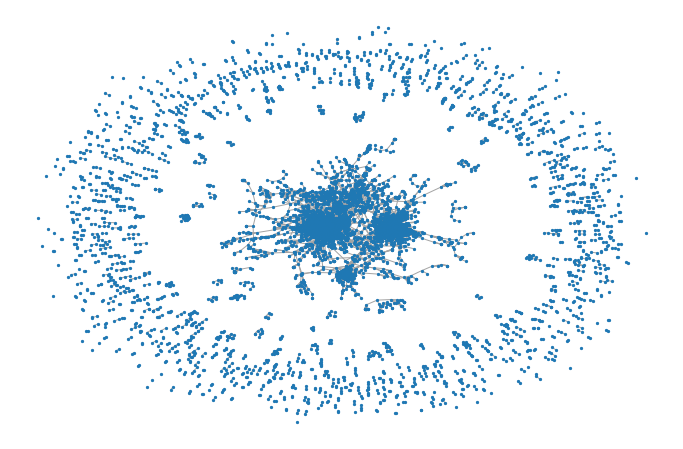

In [65]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(G_all_interconnected_edge, node_size =5, edge_color='#a4a4a4', with_labels=False, font_color='#cacaca')
    plt.axis('off')

## 2.10. Embedding:

One of the confinements of charts remains the nonattendance of vector highlights. A bit like in NLP, we confront structured data. But rather like in NLP, we can learn an implanting of the chart! There are a few levels of inserting in a chart: Implanting chart components (hubs, edges, feature) (Node2Vec). Inserting sub-parts of a chart or an entirety chart (Graph2Vec) After learning an inserting, it can be utilized as highlights for a few errands: classification, recommender frameworks

In case you've got a few time, check out the total article on the inserting process by the creator of the node2vec library. The embeddings are learned within the same way as word2vec’s skip-gram embeddings are learned, employing a skip-gram show. The address is, how can we create the input corpus for Node2Vec? The data are much more complex, i.e. (un)directed, (un)weighted, (a)cyclic… To create the corpus, we utilize arbitrary strolls examining procedure. Ready to indicate the number of strolls to run and the length of the strolls.

## 2.10.1. Node2Vec: For all edges and nodes which has labels

In [66]:
%%time
node2vec = Node2Vec(G_labels, dimensions=32, walk_length=6, num_walks=100, workers=2)
model_G_labels = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/18720 [00:00<?, ?it/s]

CPU times: user 4min 14s, sys: 55.1 s, total: 5min 9s
Wall time: 4min 55s


## 2.10.2. Node2Vec: For all edges and all nodes 


In [67]:
%%time
node2vec = Node2Vec(G_all_nodes_edge, dimensions=32, walk_length=6, num_walks=100, workers=2)
model_G_all_nodes_edge = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/36928 [00:00<?, ?it/s]

CPU times: user 14min 3s, sys: 2min 44s, total: 16min 47s
Wall time: 16min 29s


## 2.10.3. Node2Vec: For only those nodes that has edges and labels.

In [68]:
%%time
node2vec = Node2Vec(G_all_interconnected_edge, dimensions=32, walk_length=6, num_walks=100, workers=2)
model_G_all_interconnected_edge = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/6565 [00:00<?, ?it/s]

CPU times: user 2min 40s, sys: 35.1 s, total: 3min 15s
Wall time: 3min 21s


## 2.11. Saving Model

In [69]:
# Save the Modle to file in the current working directory
# Load the Model to ile
with open("model_node2vec_1.pkl", 'wb') as file:  
    pickle.dump(model_G_labels, file)
with open("model_node2vec_2.pkl", 'wb') as file:  
    pickle.dump(model_G_all_nodes_edge, file)
with open("model_node2vec_3.pkl", 'wb') as file:  
    pickle.dump(model_G_all_interconnected_edge, file)
# Load the Model back from file
with open("model_node2vec_1.pkl", 'rb') as file:  
    model_G_labels = pickle.load(file)
with open("model_node2vec_2.pkl", 'rb') as file:  
    model_G_all_nodes_edge = pickle.load(file)
with open("model_node2vec_1.pkl", 'rb') as file:  
    model_G_all_interconnected_edge = pickle.load(file)

## 2.12. Checking embedding and similar nodes

In [70]:
model_G_labels.wv.get_vector('66779408')

array([-2.90005952e-02,  9.75771993e-03,  2.25731134e-02,  1.56452432e-02,
       -9.69251990e-03,  2.68204585e-02, -2.04890966e-05,  6.30199164e-03,
        7.07638264e-03, -1.01271942e-02, -1.64253265e-02,  2.42760181e-02,
        2.70873606e-02, -5.15621156e-03,  2.76765972e-02, -2.19058022e-02,
       -8.21018964e-03, -1.07980967e-02,  2.03927979e-02,  1.18274465e-02,
        2.61445493e-02, -1.46904960e-02,  1.22080669e-02,  1.02399513e-02,
        1.24452040e-02, -2.67198980e-02, -7.97796994e-03, -4.45427001e-03,
        2.05619857e-02, -1.07435212e-02, -8.67394358e-03,  1.68910325e-02],
      dtype=float32)

In [71]:
model_G_labels.wv.most_similar('66779408')

[('51790431', 0.6537933945655823),
 ('10304600', 0.6428183913230896),
 ('28143942', 0.5725999474525452),
 ('35936978', 0.5570929646492004),
 ('34812125', 0.5488573908805847),
 ('21791503', 0.5442457795143127),
 ('23787166', 0.544094979763031),
 ('39727361', 0.5410721898078918),
 ('11590324', 0.5383136868476868),
 ('62427954', 0.5313761234283447)]

## 2.13. Creating Random seed numbers

In [72]:
randomlist = []
for i in range(0,10):
    n = random.randint(1,100)
    randomlist.append(n)
print(randomlist)

[79, 26, 39, 7, 74, 64, 15, 2, 15, 16]


I'm using this random seeds for K-means clustering to get the NMI score of different seeds and get the average of all the NMI scores and give us the output. 

## 2.14. K-means clustering:

K-Means Clustering could be a basic however effective calculation in information science There are a plethora of real-world applications of K-Means Clustering (many of which we'll  cover here) This comprehensive direct will present you to the world of clustering and K-Means Clustering together with usage in Python on a real-world dataset

## 2.14.1. K-means clustering: For all edges and nodes which has labels

In [73]:
embedding_1 = []
for i in G_labels.nodes():
     embedding_1.append(model_G_labels.wv.get_vector(str(i)))
        
NMI_score_avg = []

for i in randomlist:
    np.random.seed(i)
    kmeans = KMeans(init='k-means++', n_clusters=5, n_init=35)
    kmeans.fit_predict(embedding_1)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    error = kmeans.inertia_
    true_labels = df_nodes['label'].values
    predicted_labels = labels
    NMI = normalized_mutual_info_score(true_labels, predicted_labels)
    NMI_score_avg.append(NMI)
    
print('Average of NMI score for 10 random seeds for Kmeans :', statistics.mean(NMI_score_avg))

Average of NMI score for 10 random seeds for Kmeans : 0.2831131379322988


In [74]:
colors = ['#00BFFF', '#FF3030', '#FFD700', '#CAFF70', '#BF3EFF']

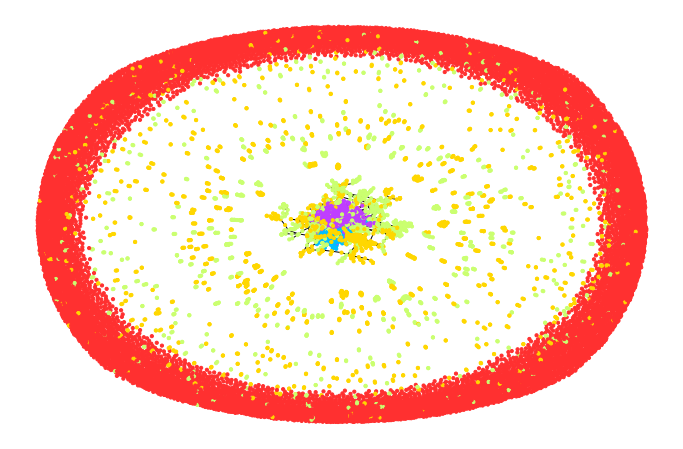

In [75]:
node_colors = [colors[v] for v in labels]
fig = plt.subplots(1, figsize=(12,8))
nx.draw(G_labels, node_color=node_colors,node_size =10)

The above graph is for all the clusters the K-means has predicted. This graph shows the clustering for all the nodes and all the edges that has labels. From the graph, we can see that some nodes don't have any edges but have a label attached to them. Most of the unedges nodes are blue and are segregated at the letter of the graph. We are also able to see that there are a few of the green and the red non-edged nodes. These notes are not that frequent as blue ones, but they are present. We are also able to see that some of the blue and green has some number of edges which we can see between the centre and the corners. There are some green and red nodes that have strong edges, we can see those at the middle and are attached very strongly to each other. One of the most important nodes which have very strong edges connected are violet in colour and are mostly in the centre. These nodes have a high number of edges with each other so are very close to each other. Like violet, yellow labels are also a very high number of edges connected that is the reason why those edges are very close to each other and are at the centre. 

We can also see that the NMI score for the true and predictable label are very less that is 0.2876. This means that the clusters are not properly identified by the K-means model. 

## 2.14.2. K-means clustering: For only those nodes that has edges and labels.

In [76]:
embedding_2 = []
true_labels_2 = []
for i in G_all_interconnected_edge.nodes():
    embedding_2.append(model_G_all_interconnected_edge.wv.get_vector(str(i)))
    a = df_nodes[df_nodes['node_id'] == i]['label'].values[0]
    true_labels_2.append(a)
    
NMI_score_avg = []

for i in randomlist:
    np.random.seed(i)
    kmeans = KMeans(init='k-means++', n_clusters=5, n_init=35)
    kmeans.fit_predict(embedding_2)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    error = kmeans.inertia_
    true_labels = true_labels_2
    predicted_labels = labels
    NMI = normalized_mutual_info_score(true_labels, predicted_labels)
    NMI_score_avg.append(NMI)
    
print('Average of NMI score for 10 random seeds for Kmeans :', statistics.mean(NMI_score_avg))

Average of NMI score for 10 random seeds for Kmeans : 0.2169083295493949


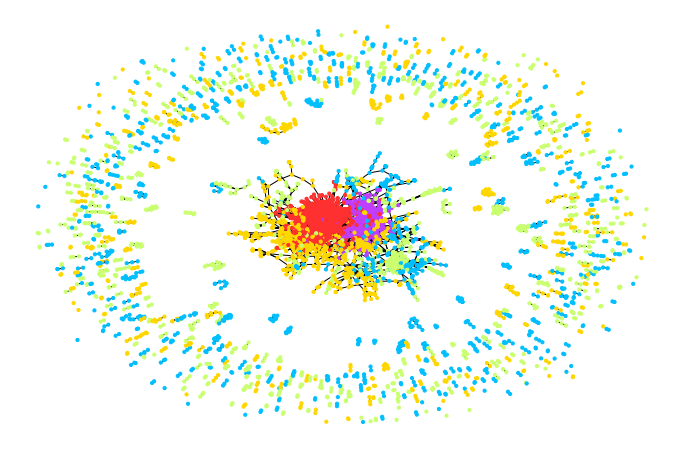

In [77]:
node_colors = [colors[v] for v in labels]
fig = plt.subplots(1, figsize=(12,8))
nx.draw(G_all_interconnected_edge, node_color=node_colors, node_size =10)

The above graph shows the nodes and edges graph for the nodes that have at least one edge. The graph also shows that nodes with the same label have most of the same label nodes attached to them. If we compare this graph to the above graph we can also see a clear image of the clustering of the nodes with their edges. We can see that green, yellow, violet, blue and red colour labels are grouped and clustered strongly together at the centred, whereas at the corners blue, red and violet colours are only there. The order. We are also able to see two clustered which are the centre and the corners which are shows that only a few labels have very few edges, while other nodes have strongly connected edges. We can see from the above graph that green and yellow are two different nodes that are segregated into different clusters. 

Still, the NMI score is 0.2067 which is less than the above score we got. From this, I was able to understand that if we reduced the nodes for the cluster, it is hard for the model to find the clusters in the data. Which means it will reduce the NMI score for the model. 

2.14.3. K-means clustering: For all edges and all nodes 

In [78]:
embedding_3 = []
for i in df_nodes['node_id']:
     embedding_3.append(model_G_all_nodes_edge.wv.get_vector(str(i)))
        
NMI_score_avg = []

for i in randomlist:
    np.random.seed(i)
    kmeans = KMeans(init='k-means++', n_clusters=5, n_init=35)
    kmeans.fit_predict(embedding_3)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    error = kmeans.inertia_
    true_labels = df_nodes['label'].values
    predicted_labels = labels
    NMI = normalized_mutual_info_score(true_labels, predicted_labels)
    NMI_score_avg.append(NMI)
    
print('Average of NMI score for 10 random seeds for Kmeans :', statistics.mean(NMI_score_avg))

Average of NMI score for 10 random seeds for Kmeans : 0.3370676120419057


Finally, for Node2Vec embedding, I tried all the model and edges that are given in the dataset. Which doesn't have labels present in it too. This has increased the number of nodes and edges in the graph but, also increased the time to compute the model. As its learning each embedding that doesn't have a label attached to it, the model can learn more from the dataset. which is why we are getting the highest NMI score among all the above models. For this, we are getting a 0.3369 NMI score. Which is less in itself, but is far much better than the above model. This graph has nodes that don't have labels attached to it. We cannot create a clustering graph for this model. 

## 2.15. Embedding: **laplacian_matrix:**

The instinct for this may be spurred by perceiving the Laplacian has a few valuable properties missing within the contiguousness matrix: The littlest eigenvalue of 𝐿 L is 𝜆0=0 λ 0 = 0 and its assortment breaks even with the number of associated components within the graph. The eigenspace of 𝜆0 λ 0 is traversed by the marker vectors of those components. 𝐿 L is singular 𝐿=𝑈𝑈𝑇 L = U U T where 𝑈 U is the rate framework of the (subjectively coordinated) chart (and consequently 𝐿 L is positive-semidefinite)

In [79]:
L = nx.laplacian_matrix(G_all_interconnected_edge).astype(float)
w,v = sp.sparse.linalg.eigsh(L, k = 5, which='SM')
X = v*w

In [80]:
NMI_score_avg = []

for i in randomlist:
    np.random.seed(i)
    kmeans = KMeans(init='k-means++', n_clusters=5, n_init=35)
    kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    error = kmeans.inertia_
    true_labels = true_labels_2
    predicted_labels = labels
    NMI = normalized_mutual_info_score(true_labels, predicted_labels)
    NMI_score_avg.append(NMI)
    
print('Average of NMI score for 10 random seeds for Kmeans :', statistics.mean(NMI_score_avg))

Average of NMI score for 10 random seeds for Kmeans : 0.22891481172641798


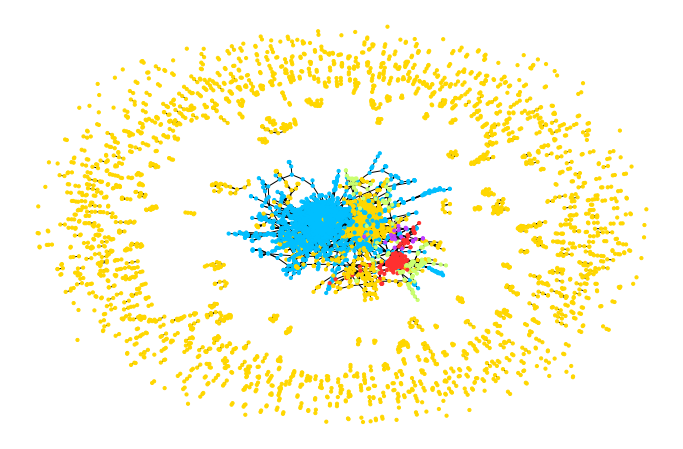

In [81]:
node_colors = [colors[v] for v in labels]
fig = plt.subplots(1, figsize=(12,8))
nx.draw(G_all_interconnected_edge, node_color=node_colors, node_size =10)

Laplacian matrix is another Graph embedding method. I used to compare another embedding method to find the NMI score for another embedding then Node2Vec embedding. But from the results, we can see that Node2Vec embedding has done a very good job to help k-means clustering to get the good NMI score which was 0.3369. Whereas the Laplacian matrix embedding doesn't help much to k-means to cluster the nodes. This embedding has to give us a very less NMI score which is 0.0852. This score is far much less the Node2vec embedding. From this, we can clearly say that the Node2vec embedding is far much better than laplacian matrix embedding for this dataset. 

From the graphs also we are not able to predict better than the above graphs. In this graph, blue is at the centre and we are not able to see the other another clustered in a better way. 

**Conclusion:** 
1.   Node2Vec embedding is better than the Laplacian matrix. 
2.   Keeping embedding of all the nodes and edges which doesn't have labels will give us better clustering.

**Reference:**

Monash FIT5212 Data analysis for semi-structured data week 8, 9, 10 and 11 materials.

**Thank You**